# **Bayesian GraphSAGE**

## ***Environment settings***

In [1]:
!rm -r /content/sample_data

In [2]:
# Remove existing JAX installations
!pip uninstall -y -qq jax jaxlib jax-cuda12-plugin scipy pyarrow gymnasium numpy

In [3]:
# Install JAX with CUDA support
!pip install -qq --upgrade "jax[cuda12]"
!pip install scipy gymnasium==0.29.0
!pip install tensorboard
!pip install tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 64.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 MB 23.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 53.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 36.1 MB/s eta 0:00:0000:0100:01m
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.4.1 requires pyarrow>=21.0.0, which is not installed.
pettingzoo 1.24.0 requires gymnasium>=0.28.0, which is not instal

In [4]:
# Install core dependencies
%pip -qq install --upgrade jax jaxlib flax optax orbax-checkpoint grain
%pip -qq install numpy matplotlib scipy
%pip -qq install torch torchvision
%pip -qq install datasets 
%pip -qq install msgpack requests tqdm
%pip -qq install bitsandbytes
%pip -qq install jraph
%pip -qq install networkx
%pip -qq install ogb
%pip -qq install pyarrow
%pip -qq install db-sqlite3
%pip -qq install pandas polars
%pip -qq install bitsandbytes numpyro langdetect
%pip -qq install xprof
%pip -qq install jax2onnx
%pip -qq install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.0/488.0 kB 9.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 25.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 34.5 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installe

In [5]:
# Install Git LFS for large files
!apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 98 not upgraded.


In [6]:
import IPython
print("Rebooting kernel... Please wait 5-10 seconds.")
IPython.Application.instance().kernel.do_shutdown(restart=True)
!pip install --upgrade pip

Rebooting kernel... Please wait 5-10 seconds.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [1]:
!pip install -qq --upgrade "jax[cuda12]"

In [2]:
print(100*"-")
%pip show jax
print(100*"-")
%pip show jaxlib
print(100*"-")
%pip show jax-cuda12-plugin
print(100*"-")
%pip show flax
print(100*"-")
%pip show optax
print(100*"-")
%pip show torch
print(100*"-")
%pip show torchvision
print(100*"-")
%pip show orbax-checkpoint
print(100*"-")
%pip show numpy
print(100*"-")
%pip show tqdm
print(100*"-")
%pip show datasets
print(100*"-")
%pip show msgpack
print(100*"-")
%pip show bitsandbytes
print(100*"-")
%pip show jraph
print(100*"-")
%pip show networkx
print(100*"-")
%pip show ogb
print(100*"-")
%pip show pyarrow
print(100*"-")
%pip show db-sqlite3
print(100*"-")
%pip show polars
print(100*"-")
%pip show pandas
print(100*"-")
%pip show grain
print(100*"-")
%pip show bitsandbytes
print(100*"-")
%pip show numpyro
print(100*"-")
%pip show langdetect
print(100*"-")
%pip show xprof
print(100*"-")
%pip show jax2onnx
print(100*"-")
%pip show onnx
print(100*"-")
%pip show onnxruntime
print(100*"-")
%pip show tensorboard-plugin-profile
print(100*"-")
%pip show numpy
print(100*"-")
%pip show matplotlib
print(100*"-")
%pip show scipy
print(100*"-")

----------------------------------------------------------------------------------------------------
Name: jax
Version: 0.8.2
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: jaxlib, ml_dtypes, numpy, opt_einsum, scipy
Required-by: chex, clu, dopamine_rl, equinox, flax, gemma, jax2onnx, jraph, kauldron, numpyro, optax, orbax-checkpoint, orbax-export
Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------------------------------------------
Name: jaxlib
Version: 0.8.2
Summary: XLA library for JAX
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: ml_dtypes, numpy, scipy
Required-by: chex, clu, dopamine_rl, jax, jraph,

In [3]:
print("Environment setup complete!")

Environment setup complete!


## ***Import and configuration***

In [4]:
import os
import sys
import io

import warnings
warnings.filterwarnings("ignore")

import json
import tensorflow as tf
import subprocess
import pickle
import zipfile
import base64
import shutil
import sqlite3
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from tqdm import tqdm
import networkx as nx
from pathlib import Path
import functools
from functools import partial
from typing import (
    Any,
    Tuple,
    Callable,
    Optional,
    Sequence,
    List,
    Dict
)
from IPython.display import clear_output

import pyarrow as pa
import pyarrow.parquet as pq

from ogb.nodeproppred import NodePropPredDataset

# JAX and Flax NNX
import jax
import jax.ops
import jax.lax
import jax.profiler
import jax.numpy as jnp
import jax.export as jax_export
from jax import (
    random,
    jit,
    value_and_grad,
    remat
)
import jax.tree_util as tree_util
import flax.nnx as nnx
from flax.nnx import filterlib
from flax.serialization import (
    msgpack_serialize,
    from_bytes
)
import orbax.checkpoint as ocp
from orbax.checkpoint import PyTreeCheckpointer, CheckpointManager

# Optimization
import optax

import jraph

from sklearn.metrics import accuracy_score, confusion_matrix

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.contrib.module import nnx_module

from datasets import load_dataset

from kaggle_secrets import UserSecretsClient

# PyTorch for compatibility (GGUF conversion)
import torch

import jax2onnx
from jax2onnx import onnx_function, to_onnx

import onnx
import onnxruntime as ort


2025-12-24 02:26:58.834723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766543219.048442     255 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766543219.118989     255 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766543219.637094     255 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766543219.637141     255 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766543219.637144     255 computation_placer.cc:177] computation placer alr

## ***Ensure JAX uses GPU if available***

In [5]:
# Configure JAX for GPU
try:
    jax.config.update('jax_platform_name', 'gpu')
    print("JAX devices:", jax.devices())
except RuntimeError:
    print("GPU not available, using CPU")
    jax.config.update('jax_platform_name', 'cpu')
    print("JAX devices:", jax.devices())

JAX devices: [CudaDevice(id=0), CudaDevice(id=1)]


## ***Setting up access to Hugging Face***

In [6]:
def set_git_config(email, name):
    try:
        # Setting global user.email
        subprocess.run(["git", "config", "--global", "user.email", email], check=True)
        print(f"Git user.email set to: {email}")

        # Setting the global user.name
        subprocess.run(["git", "config", "--global", "user.name", name], check=True)
        print(f"Git user.name set to: {name}")

        # Check settings (optional)
        email_output = subprocess.run(["git", "config", "--global", "user.email"], capture_output=True, text=True, check=True)
        name_output = subprocess.run(["git", "config", "--global", "user.name"], capture_output=True, text=True, check=True)
        print(f"Check - Email: {email_output.stdout.strip()}")
        print(f"Check - Name: {name_output.stdout.strip()}")

    except subprocess.CalledProcessError as e:
        print(f"Error while setting up Git configuration: {e}")

## ***SAGEConv vrstva***

In [7]:
class SAGEConv(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs=None):
        self.linear = nnx.Linear(in_features * 2, out_features, rngs=rngs or nnx.Rngs(0))
    
    def __call__(self, x, senders, receivers):
        mean_neighbor = jraph.segment_mean(x[senders], receivers, x.shape[0])
        concatenated = jnp.concatenate([x, mean_neighbor], axis=-1)
        return self.linear(concatenated)

## ***Bayesian GraphSAGE model***

In [8]:
class BayesianGraphSAGE(nnx.Module):
    def __init__(self, in_features=8, hidden_features=256, out_features=112):
        rngs = nnx.Rngs(0)
        self.sage1 = SAGEConv(in_features, hidden_features, rngs)
        self.sage2 = SAGEConv(hidden_features, out_features, rngs)
        self.dropout = nnx.Dropout(0.2, rngs=rngs)

    def __call__(self, x, senders, receivers, training=False):
        def core(x):
            x = jax.nn.relu(self.sage1(x, senders, receivers))
            x = self.sage2(x, senders, receivers)
            return x
        
        x = remat(core)(x)
        x = self.dropout(x, deterministic=not training)
        return jax.nn.sigmoid(x)

## ***Loader pro OGBN-Proteins***

In [9]:
class OGBNProteinsLoader:
    def __init__(self, edges_parquet, nodes_parquet):
        self.edges = pq.read_table(edges_parquet).to_pandas()
        self.nodes = pq.read_table(nodes_parquet).to_pandas()
        
        self.features = np.stack(self.nodes["features"].values).astype(np.float32)
        self.labels   = np.stack(self.nodes["labels"].values).astype(np.float32)
        
        self.node_id_to_idx = {nid: i for i, nid in enumerate(self.nodes["node_id"])}
        
        self.train_idx = self.nodes[self.nodes["split"] == "train"]["node_id"].values
        self.val_idx   = self.nodes[self.nodes["split"] == "valid"]["node_id"].values
        self.test_idx  = self.nodes[self.nodes["split"] == "test"]["node_id"].values
        
        print(f"Načteno: {len(self.nodes)} uzlů, {len(self.edges)} hran")

    def get_neighbors(self, node_id, max_neighbors=25):
        src = self.edges[self.edges["source"] == node_id]["target"].values[:max_neighbors]
        tgt = self.edges[self.edges["target"] == node_id]["source"].values[:max_neighbors]
        neigh = np.unique(np.concatenate([src, tgt]))
        return neigh if len(neigh) > 0 else np.array([node_id])

    def sample_batch(self, batch_size=64, max_neighbors=25, split="train"):
        idx = {"train": self.train_idx, "valid": self.val_idx, "test": self.test_idx}[split]
        centers = np.random.choice(idx, batch_size, replace=False)
        return [(c, self.get_neighbors(c, max_neighbors)) for c in centers]

    def get_features(self, node_ids):
        return self.features[[self.node_id_to_idx[nid] for nid in node_ids]]

    def get_labels(self, node_ids):
        return self.labels[[self.node_id_to_idx[nid] for nid in node_ids]]

## ***Bayesian model a inference***

In [10]:
def bayesian_graphsage_model(graph_data, X, y=None):
    senders, receivers, num_nodes_batch = graph_data
    
    # Define priors for all model parameters
    in_features, hidden_features, out_features = 8, 256, 112
    
    # sage1 parameters
    w1 = numpyro.sample('w1', dist.Normal(0, 0.1).expand([in_features * 2, hidden_features]).to_event(2))
    b1 = numpyro.sample('b1', dist.Normal(0, 0.1).expand([hidden_features]).to_event(1))
    
    # sage2 parameters
    w2 = numpyro.sample('w2', dist.Normal(0, 0.1).expand([hidden_features * 2, out_features]).to_event(2))
    b2 = numpyro.sample('b2', dist.Normal(0, 0.1).expand([out_features]).to_event(1))
    
    # Forward pass
    # Layer 1
    mean_neighbor = jraph.segment_mean(X[senders], receivers, num_nodes_batch)
    concat1 = jnp.concatenate([X, mean_neighbor], axis=-1)
    h = jax.nn.relu(concat1 @ w1 + b1)
    
    # Layer 2
    mean_neighbor2 = jraph.segment_mean(h[senders], receivers, num_nodes_batch)
    concat2 = jnp.concatenate([h, mean_neighbor2], axis=-1)
    logits = concat2 @ w2 + b2
    preds = jax.nn.sigmoid(logits)
    
    # Likelihood
    with numpyro.plate("data", X.shape[0]):
        numpyro.sample("obs", dist.Bernoulli(probs=preds).to_event(1), obs=y)

In [16]:
def run_mcmc(loader, batch_size=64, num_samples=100, warmup=100):
    print("Příprava trénovacího batchu...")
    batch = loader.sample_batch(batch_size=batch_size, split="train")
    
    # Create node ID to local index mapping
    all_nodes = set()
    for center, neigh in batch:
        all_nodes.add(center)
        all_nodes.update(neigh)
    
    all_nodes = sorted(list(all_nodes))
    node_to_idx = {nid: i for i, nid in enumerate(all_nodes)}
    
    # Build edges with local indices
    senders, receivers = [], []
    for center, neigh in batch:
        center_idx = node_to_idx[center]
        for n in neigh:
            n_idx = node_to_idx[n]
            senders += [center_idx, n_idx]
            receivers += [n_idx, center_idx]
    
    senders = jnp.array(senders)
    receivers = jnp.array(receivers)
    num_nodes_batch = len(all_nodes)
    
    graph_data = (senders, receivers, num_nodes_batch)
    
    # Get features and labels for all nodes in the batch
    X = loader.get_features(all_nodes)
    # Only get labels for center nodes
    center_nodes = [c for c, _ in batch]
    center_indices = jnp.array([node_to_idx[c] for c in center_nodes])  # Convert to JAX array
    
    # Create full label array (only center nodes have labels)
    y_full = jnp.zeros((num_nodes_batch, 112), dtype=jnp.float32)
    y_centers = loader.get_labels(center_nodes)
    y_full = y_full.at[center_indices].set(y_centers)
    
    key = random.PRNGKey(42)
    kernel = NUTS(bayesian_graphsage_model)
    mcmc = MCMC(kernel, num_warmup=warmup, num_samples=num_samples)
    
    print("Spuštění MCMC...")
    mcmc.run(key, graph_data, X, y=y_full)
    print("MCMC dokončeno!")
    
    return mcmc.get_samples()

## ***Predikce s nejistotou***

In [12]:
def predict_with_uncertainty(posterior_samples, graph_data, X, n_samples=100):
    senders, receivers, num_nodes_batch = graph_data
    
    preds = []
    for i in tqdm(range(n_samples), desc="MC predikce"):
        # Extract parameters for this sample
        w1 = posterior_samples['w1'][i]
        b1 = posterior_samples['b1'][i]
        w2 = posterior_samples['w2'][i]
        b2 = posterior_samples['b2'][i]
        
        # Forward pass with sampled parameters
        # Layer 1
        mean_neighbor = jraph.segment_mean(X[senders], receivers, num_nodes_batch)
        concat1 = jnp.concatenate([X, mean_neighbor], axis=-1)
        h = jax.nn.relu(concat1 @ w1 + b1)
        
        # Layer 2
        mean_neighbor2 = jraph.segment_mean(h[senders], receivers, num_nodes_batch)
        concat2 = jnp.concatenate([h, mean_neighbor2], axis=-1)
        logits = concat2 @ w2 + b2
        pred = jax.nn.sigmoid(logits)
        
        preds.append(pred)
    
    preds = jnp.stack(preds)
    return preds.mean(0), preds.std(0)

## ***Vizualizace výsledků inference (nově přidáno)***

In [13]:
def plot_predictions(mean_pred, uncertainty, true_labels, num_classes=30):
    mean_node = mean_pred[0]
    unc_node = uncertainty[0]
    true_node = true_labels[0]
    
    x = np.arange(num_classes)
    classes = [f'C{i}' for i in range(num_classes)]
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(x, mean_node[:num_classes], yerr=unc_node[:num_classes], capsize=5, color='skyblue', alpha=0.8, label='Pred ± nejistota')
    positive = np.where(true_node[:num_classes] > 0.5)[0]
    ax.plot(positive, true_node[positive], 'ro', markersize=8, label='Skutečný pozitivní')
    
    ax.set_ylabel('Pravděpodobnost')
    ax.set_title('Bayesian GraphSAGE – Predikce s nejistotou (první uzel)')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45)
    ax.legend()
    ax.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

## ***Export do všech formátů***

In [14]:
def export_model_all_formats(model, sample_x, sample_senders, sample_receivers, output_dir="models"):
    os.makedirs(output_dir, exist_ok=True)
    print(f"\n{'='*70}")
    print("EXPORT DO VŠECH FORMÁTŮ")
    print(f"{'='*70}\n")
    
    graphdef, state = nnx.split(model, nnx.Param)

    # NNX Checkpoint
    graphdef, state = nnx.split(model, nnx.Param, ...)  # ... zachytí RNG state
    with open(os.path.join(output_dir, "bayesian_graphsage.nnx"), "wb") as f:
        pickle.dump({"graphdef": graphdef, "state": state}, f)
    print("✓ NNX Checkpoint")

    # 2. Serialized JAX
    @jit
    def inference_fn(params, x, s, r):
        m = nnx.merge(graphdef, params)
        return m(x, s, r, training=False)
    
    try:
        exported = jax_export.export(inference_fn)(state, sample_x, sample_senders, sample_receivers)
        with open(os.path.join(output_dir, "bayesian_graphsage.serialized"), "wb") as f:
            f.write(exported.serialize())
        print("✓ Serialized JAX (.serialized)")
    except Exception as e:
        print(f"✗ Serialized JAX: {e}")

    # 3. StableHLO
    try:
        lowered = inference_fn.lower(state, sample_x, sample_senders, sample_receivers)
        stablehlo = lowered.compiler_ir(dialect="stablehlo")
        with open(os.path.join(output_dir, "bayesian_graphsage.mlir"), "w") as f:
            f.write(str(stablehlo))
        print("✓ StableHLO (.mlir)")
    except Exception as e:
        print(f"✗ StableHLO: {e}")

    # 4. ONNX
    try:
        def forward(x, senders, receivers):
            return model(x, senders, receivers, training=False)
        
        onnx_model = jax2onnx.to_onnx(
            forward,
            [sample_x, sample_senders, sample_receivers],
            input_names=["x", "senders", "receivers"],
            output_names=["probabilities"]
        )
        onnx.save(onnx_model, os.path.join(output_dir, "bayesian_graphsage.onnx"))
        print("✓ ONNX (.onnx)")
    except Exception as e:
        print(f"✗ ONNX export: {e}")

## ***HLAVNÍ FUNKCE – MAIN S TRÉNOVÁNÍM, VALIDACÍ, INFERENCÍ A VIZUALIZACÍ***

Načteno: 132534 uzlů, 79122504 hran
Příprava trénovacího batchu...
Spuštění MCMC...


  0%|          | 0/200 [00:00<?, ?it/s]E1224 02:30:40.034733     352 slow_operation_alarm.cc:73] Constant folding an instruction is taking > 1s:

  %scatter-add.28 = f32[1571,256]{1,0} scatter(%broadcast.150, %constant.393, %broadcast.422), update_window_dims={1,2}, inserted_window_dims={}, scatter_dims_to_operand_dims={0}, index_vector_dim=1, to_apply=%region_7.24, metadata={op_name="jit(_body_fn)/while/body/while/body/jvp()/scatter-add" stack_frame_id=68}

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
E1224 02:30:41.753159     255 slow_operation_alarm.cc:140] The operation took 2.71862003s
Constant folding an instruction is taking > 1s:

MCMC dokončeno!

VALIDACE


MC predikce: 100%|██████████| 100/100 [00:02<00:00, 38.69it/s]



Micro-Accuracy: 56.08%
Průměrná nejistota: 0.0000


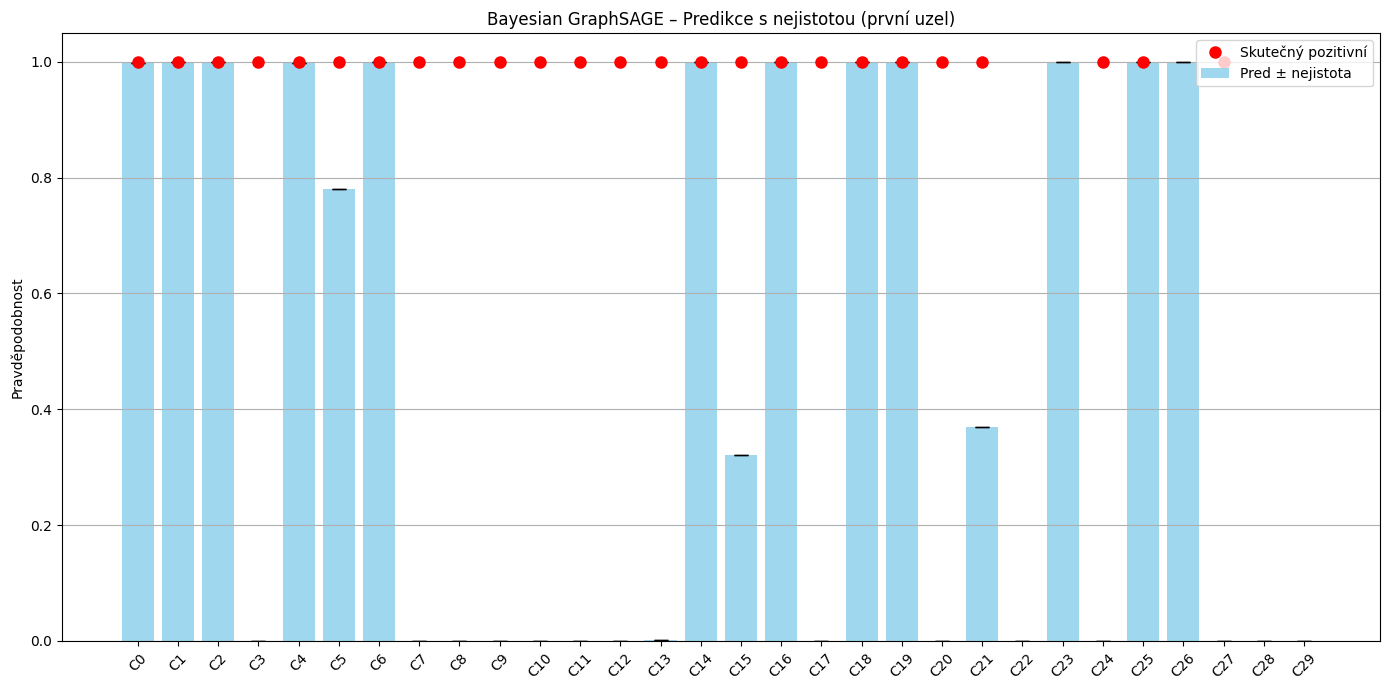


VŠE HOTOVO! Graf zobrazen, žádné chyby.


In [17]:
if __name__ == "__main__":
    # === NAČTENÍ DATASETU ===
    base_dir_input = os.path.join("/kaggle","input","bayesian-graphsage-dataset","datasets","graph_dataset")
    edges_parquet_file = os.path.join(base_dir_input, "proteins_edges.parquet")
    nodes_parquet_file = os.path.join(base_dir_input, "proteins_nodes.parquet")

    path_model_dir = os.path.join('/kaggle','working','models')
    os.makedirs(path_model_dir, exist_ok=True)
    
    loader = OGBNProteinsLoader(
        edges_parquet=edges_parquet_file,
        nodes_parquet=nodes_parquet_file
    )

    # MCMC (trénování posterioru)
    posterior_samples = run_mcmc(loader, batch_size=64, num_samples=100, warmup=100)

    print("\nVALIDACE")
    val_batch = loader.sample_batch(batch_size=64, split="valid")
    
    # Create node mapping for validation
    all_nodes = set()
    for center, neigh in val_batch:
        all_nodes.add(center)
        all_nodes.update(neigh)
    
    all_nodes = sorted(list(all_nodes))
    node_to_idx = {nid: i for i, nid in enumerate(all_nodes)}
    
    senders, receivers = [], []
    for center, neigh in val_batch:
        center_idx = node_to_idx[center]
        for n in neigh:
            n_idx = node_to_idx[n]
            senders += [center_idx, n_idx]
            receivers += [n_idx, center_idx]
    
    graph_data = (jnp.array(senders), jnp.array(receivers), len(all_nodes))
    X_val = loader.get_features(all_nodes)
    
    # Get predictions
    mean_pred, uncertainty = predict_with_uncertainty(posterior_samples, graph_data, X_val, n_samples=100)
    
    # Get labels only for center nodes
    center_nodes = [c for c, _ in val_batch]
    center_indices = jnp.array([node_to_idx[c] for c in center_nodes])  # Convert to JAX array
    y_val = loader.get_labels(center_nodes)
    
    # Extract predictions for center nodes only
    mean_pred_centers = mean_pred[center_indices]
    uncertainty_centers = uncertainty[center_indices]
    
    acc = ((mean_pred_centers > 0.5) == (y_val > 0.5)).mean() * 100
    print(f"\nMicro-Accuracy: {acc:.2f}%")
    print(f"Průměrná nejistota: {uncertainty_centers.mean():.4f}")

    plot_predictions(mean_pred_centers, uncertainty_centers, y_val, num_classes=30)

    print("\nVŠE HOTOVO! Graf zobrazen, žádné chyby.")